# **模型調校（Model Tuning）**
此份程式碼會提供針對某資料集的模型調校策略，以及比較其超參數的選擇。

## 本章節內容大綱
* ### [損失函數（Loss function）](#LossFunction)
* ### [激活函數（Activation function）](#ActivationFunction)
* ### [優化器（Optimizer）](#Optimizer)
* ### [學習率（Learning rate）](#LearningRate)
* ### [模型架構（Model architecture）](#ModelArchitecture)

## 匯入套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow 相關套件
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 創建資料集／載入資料集（Dataset Creating / Loading）

In [2]:
train_df = pd.read_csv('./Data/News_train.csv')
test_df = pd.read_csv('./Data/News_test.csv')

In [3]:
train_df.head()

,shr,revs,note,banks,oper,avg,shrs,wheat,mths,gas,...,version,algerian,cement,263,seaway,restructured,night's,unknown,731,y_category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


* #### 新聞文章資料集
訓練集，測試集分別為 7728，1907 筆，4081 種常用字詞，若在同一篇新聞中出現該字詞為 1，若否則為 0，y_category 標記文章類別，共 11 種類別。

In [4]:
X_df = train_df.iloc[:, :-1].values
y_df = train_df.y_category.values

In [5]:
X_test = test_df.iloc[:, :-1].values
y_test = test_df.y_category.values

## 資料前處理（Data Preprocessing）

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Feature scaling
sc = StandardScaler()
X_scale = sc.fit_transform(X_df, y_df)
X_test_scale = sc.transform(X_test)

In [7]:
# Convert to One-Hot encoding
y_onehot = keras.utils.to_categorical(y_df)
y_test_onehot = keras.utils.to_categorical(y_test)

In [8]:
# train, valid/test dataset split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scale, y_onehot,
                                                      test_size=0.2,
                                                      random_state=17,
                                                      stratify=y_df)

In [9]:
print(f'X_train shape: {X_train.shape}')
print(f'X_valid shape: {X_valid.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_valid shape: {y_valid.shape}')

X_train shape: (6182, 4081)
X_valid shape: (1546, 4081)
y_train shape: (6182, 11)
y_valid shape: (1546, 11)


## 模型建置（Model Building）

In [10]:
def build_model(input_shape, output_shape):
    keras.backend.clear_session()  # 重置 keras 的所有狀態
    tf.random.set_seed(17)  # 設定 tensorflow 隨機種子

    model = keras.models.Sequential()
    model.add(layers.Dense(16,  # 神經元個數
                           input_shape=input_shape,  # 輸入形狀
                           activation='sigmoid'))  # 激活函數
    model.add(layers.Dense(16,
                           activation='sigmoid'))
    model.add(layers.Dense(output_shape,
                           activation='softmax'))
    return model

In [11]:
model = build_model(X_train[0].shape, y_onehot.shape[1])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                65312     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 11)                187       
                                                                 
Total params: 65,771
Trainable params: 65,771
Non-trainable params: 0
_________________________________________________________________


2023-02-22 18:15:25.912780: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-22 18:15:26.537489: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10417 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:04:00.0, compute capability: 6.1


## 模型訓練（Model Training）

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [13]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
97/97 [==============================] - 1s 5ms/step - loss: 1.9789 - acc: 0.3484 - val_loss: 1.6104 - val_acc: 0.4877
Epoch 2/20
97/97 [==============================] - 0s 3ms/step - loss: 1.4352 - acc: 0.5793 - val_loss: 1.3256 - val_acc: 0.6190
Epoch 3/20
97/97 [==============================] - 0s 3ms/step - loss: 1.1953 - acc: 0.6341 - val_loss: 1.1493 - val_acc: 0.6223
Epoch 4/20
97/97 [==============================] - 0s 3ms/step - loss: 1.0142 - acc: 0.6873 - val_loss: 1.0236 - val_acc: 0.7096
Epoch 5/20
97/97 [==============================] - 0s 3ms/step - loss: 0.8801 - acc: 0.7496 - val_loss: 0.9398 - val_acc: 0.7212
Epoch 6/20
97/97 [==============================] - 0s 3ms/step - loss: 0.7794 - acc: 0.7826 - val_loss: 0.8836 - val_acc: 0.7652
Epoch 7/20
97/97 [==============================] - 0s 3ms/step - loss: 0.6998 - acc: 0.8462 - val_loss: 0.8402 - val_acc: 0.7833
Epoch 8/20
97/97 [==============================] - 0s 3ms/step - loss: 0.6319 - acc: 0.85

## 模型評估（Model Evaluation）

In [14]:
train_loss = history.history['loss']
train_acc = history.history['acc']

valid_loss = history.history['val_loss']
valid_acc = history.history['val_acc']

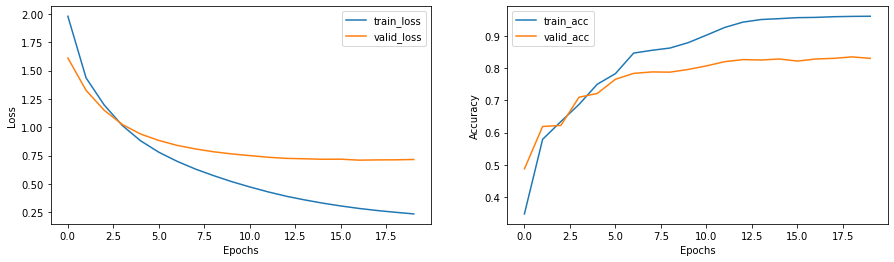

In [15]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_loss)), train_loss, label='train_loss')
plt.plot(range(len(valid_loss)), valid_loss, label='valid_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(train_acc)), train_acc, label='train_acc')
plt.plot(range(len(valid_acc)), valid_acc, label='valid_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 模型調校

![](https://i.imgur.com/WY7awUI.png)

<a name="LossFuction"></a>
* ## 損失函數（Loss function）
tf.keras.losses: https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [16]:
# 以下放置要比較的 loss function
loss_funcs = ['mean_squared_error',
              'categorical_crossentropy',
              'mean_absolute_error']

batch_size = 64
epochs = 20

# 建立兩個 list 記錄選用不同 loss function 的訓練結果
all_loss, all_acc = [], []

# 迭代不同的 loss function 去訓練模型
for loss_f in loss_funcs:
    print(f'Running model, loss = {loss_f}')

    # 確保每次都是訓練新的模型，而不是接續上一輪的模型
    model = build_model(X_train[0].shape, y_onehot.shape[1])
    model.compile(loss=loss_f,
                  optimizer='rmsprop',
                  metrics=['acc'])

    # 確保每次都設定一樣的參數
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(X_valid, y_valid))

    # 將訓練過程記錄下來
    all_loss.append(history.history['loss'])
    all_acc.append(history.history['acc'])
print('----------------- training done! -----------------')

Running model, loss = mean_squared_error
Running model, loss = categorical_crossentropy
Running model, loss = mean_absolute_error
----------------- training done! -----------------


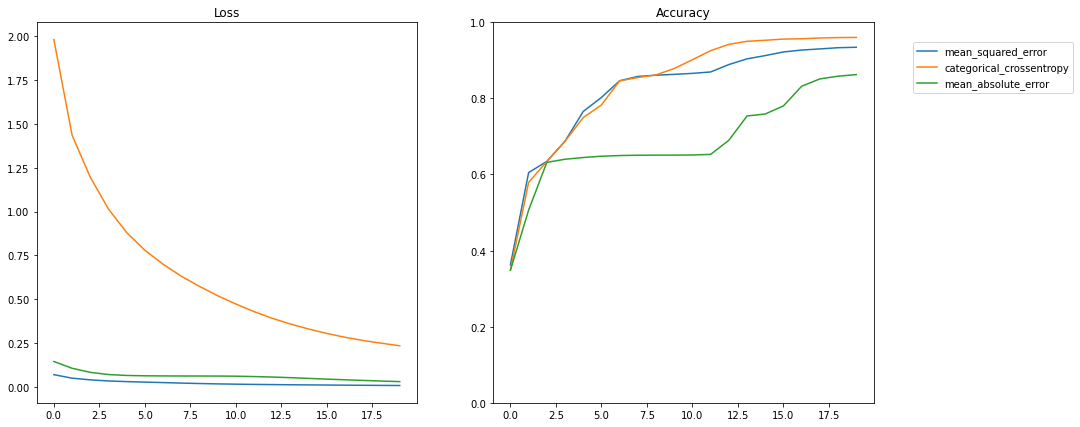

In [17]:
# 視覺化訓練過程
plt.figure(figsize=(15, 7))

# 繪製 Training loss
plt.subplot(121)
for k in range(len(loss_funcs)):
    plt.plot(range(len(all_loss[k])), all_loss[k], label=loss_funcs[k])
plt.title('Loss')

# 繪製 Training accuracy
plt.subplot(122)
for k in range(len(loss_funcs)):
    plt.plot(range(len(all_acc[k])), all_acc[k], label=loss_funcs[k])
plt.title('Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.)
plt.ylim((0, 1))
plt.show()

---
![](https://i.imgur.com/vBnVoRI.png)

---

<a name="ActivationFuction"></a>
* ## 激活函數（Activation function）
tf.keras.activations: https://www.tensorflow.org/api_docs/python/tf/keras/activations

In [18]:
def build_model_activation(input_shape, output_shape, activation):
    # 重新建構一個可以更改 Activation 的模型
    keras.backend.clear_session()
    tf.random.set_seed(17)

    model = keras.models.Sequential()
    model.add(layers.Dense(16,
                           input_shape=input_shape))
    if activation == 'leakyrelu':
        model.add(layers.LeakyReLU())  # LeakyReLU 位置於 Layers 底下
    else:
        model.add(layers.Activation(activation))  # 由此更改 Activation

    model.add(layers.Dense(16))
    if activation == 'leakyrelu':
        model.add(layers.LeakyReLU())  # LeakyReLU 位置於 Layers 底下
    else:
        model.add(layers.Activation(activation))  # 由此更改 Activation

    model.add(layers.Dense(output_shape,
                           activation='softmax'))
    return model

In [19]:
# 以下放置要比較的 activation function
activation_funcs = ['linear',
                    'sigmoid',
                    'tanh',
                    'relu',
                    'softplus',
                    'leakyrelu',
                    'swish']

batch_size = 64
epochs = 20

# 建立兩個 list 記錄選用不同 activation function 的訓練結果
all_loss, all_acc = [], []

# 迭代不同的 activation function 去訓練模型
for activation_f in activation_funcs:
    print(f'Running model, activation = {activation_f}')

    # 確保每次都是訓練新的模型，而不是接續上一輪的模型
    model = build_model_activation(X_train[0].shape,
                                   y_onehot.shape[1],
                                   activation_f)
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['acc'])

    # 確保每次都設定一樣的參數
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(X_valid, y_valid))

    # 將訓練過程記錄下來
    all_loss.append(history.history['loss'])
    all_acc.append(history.history['acc'])
print('----------------- training done! -----------------')

Running model, activation = linear
Running model, activation = sigmoid
Running model, activation = tanh
Running model, activation = relu
Running model, activation = softplus
Running model, activation = leakyrelu
Running model, activation = swish
----------------- training done! -----------------


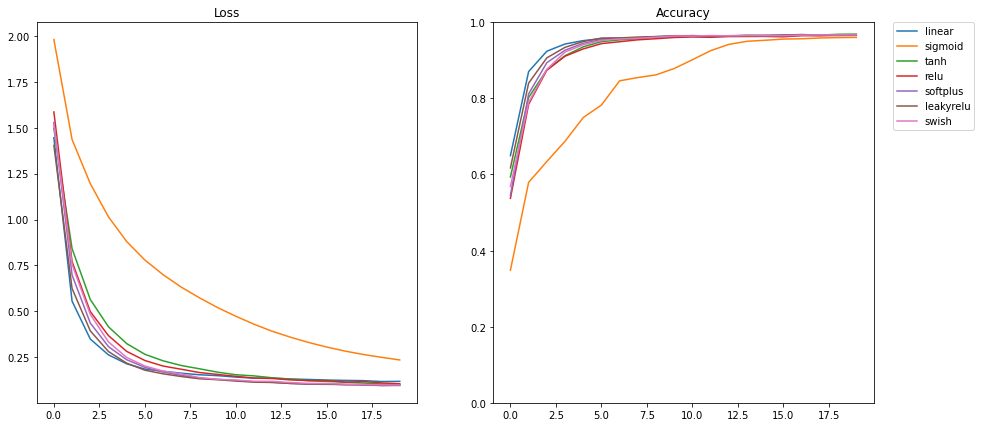

In [20]:
# 視覺化訓練過程
plt.figure(figsize=(15, 7))

# 繪製 Training loss
plt.subplot(121)
for k in range(len(activation_funcs)):
    plt.plot(range(len(all_loss[k])), all_loss[k], label=activation_funcs[k])
plt.title('Loss')

# 繪製 Training accuracy
plt.subplot(122)
for k in range(len(activation_funcs)):
    plt.plot(range(len(all_acc[k])), all_acc[k], label=activation_funcs[k])
plt.title('Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylim((0, 1))
plt.show()

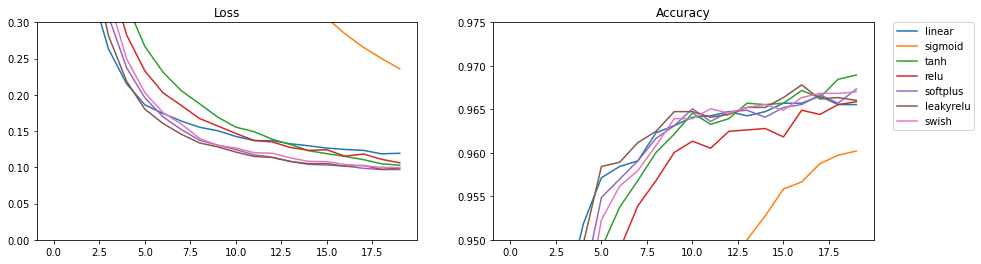

In [21]:
# 視覺化訓練過程
plt.figure(figsize=(15, 4))

# 繪製 Training loss
plt.subplot(121)
for k in range(len(activation_funcs)):
    plt.plot(range(len(all_loss[k])), all_loss[k], label=activation_funcs[k])
plt.title('Loss')
plt.ylim((0, 0.3))

# 繪製 Training accuracy
plt.subplot(122)
for k in range(len(activation_funcs)):
    plt.plot(range(len(all_acc[k])), all_acc[k], label=activation_funcs[k])
plt.title('Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylim((0.95, 0.975))
plt.show()

---
![](https://i.imgur.com/r49pQ2C.png)

---

<a name="Optimizer"></a>
* ## 優化器（Optimizer）
tf.keras.optimizers: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [22]:
# 以下放置要比較的 optimizer
optimizer_funcs = ['sgd',
                   'rmsprop',
                   'adam',
                   'nadam']

batch_size = 64
epochs = 20

# 建立兩個 list 記錄選用不同 optimizer 的訓練結果
all_loss, all_acc = [], []

# 迭代不同的 optimizer 去訓練模型
for optimizer_f in optimizer_funcs:
    print(f'Running model, optimizer = {optimizer_f}')

    # 確保每次都是訓練新的模型，而不是接續上一輪的模型
    model = build_model_activation(X_train[0].shape,
                                   y_onehot.shape[1],
                                   'tanh')
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer_f,
                  metrics=['acc'])

    # 確保每次都設定一樣的參數
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(X_valid, y_valid))

    # 將訓練過程記錄下來
    all_loss.append(history.history['loss'])
    all_acc.append(history.history['acc'])
print('----------------- training done! -----------------')

Running model, optimizer = sgd
Running model, optimizer = rmsprop
Running model, optimizer = adam
Running model, optimizer = nadam
----------------- training done! -----------------


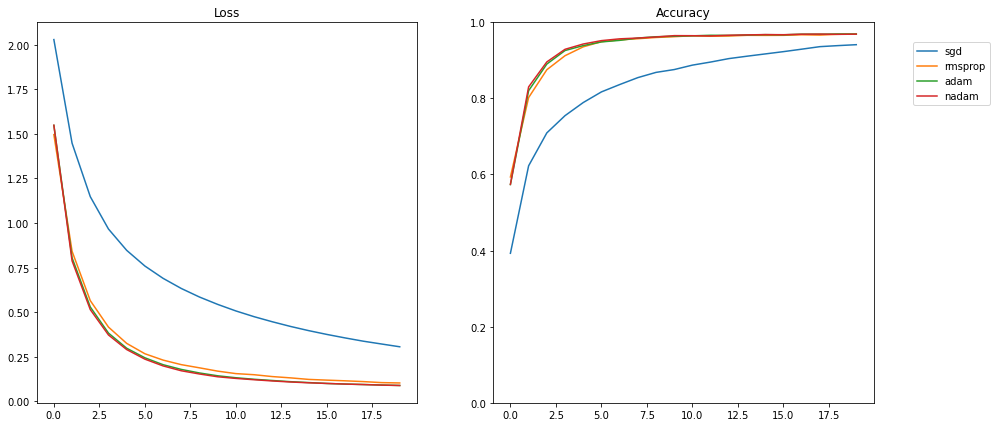

In [23]:
# 視覺化訓練過程
plt.figure(figsize=(15, 7))

# 繪製 Training loss
plt.subplot(121)
for k in range(len(optimizer_funcs)):
    plt.plot(range(len(all_loss[k])), all_loss[k], label=optimizer_funcs[k])
plt.title('Loss')

# 繪製 Training accuracy
plt.subplot(122)
for k in range(len(optimizer_funcs)):
    plt.plot(range(len(all_acc[k])), all_acc[k], label=optimizer_funcs[k])
plt.title('Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.)
plt.ylim((0, 1))
plt.show()

<a name="LearningRate"></a>
* ## 學習率（Learning rate）

In [24]:
# 以下放置要比較的 learning rate
lr_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]

batch_size = 64
epochs = 20

# 建立兩個 list 記錄選用不同 learning rate 的訓練結果
all_loss, all_acc = [], []

# 迭代不同的 learning rate 去訓練模型
for lr in lr_list:
    print(f'Running model, learning rate = {lr}')

    # 確保每次都是訓練新的模型，而不是接續上一輪的模型
    model = build_model_activation(X_train[0].shape,
                                   y_onehot.shape[1],
                                   'tanh')
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Nadam(lr),
                  metrics=['acc'])

    # 確保每次都設定一樣的參數
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(X_valid, y_valid))

    # 將訓練過程記錄下來
    all_loss.append(history.history['loss'])
    all_acc.append(history.history['acc'])
print('----------------- training done! -----------------')

Running model, learning rate = 0.1
Running model, learning rate = 0.01
Running model, learning rate = 0.001
Running model, learning rate = 0.0001
Running model, learning rate = 1e-05
----------------- training done! -----------------


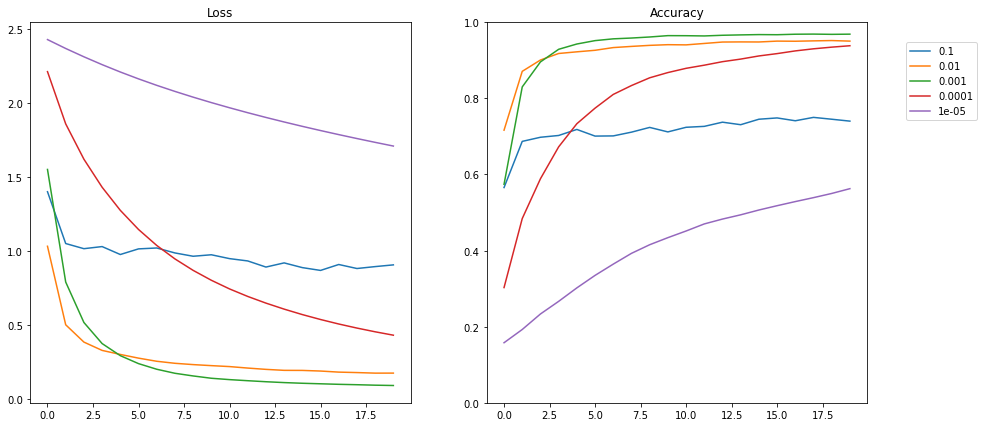

In [25]:
# 視覺化訓練過程
plt.figure(figsize=(15, 7))

# 繪製 Training loss
plt.subplot(121)
for k in range(len(lr_list)):
    plt.plot(range(len(all_loss[k])), all_loss[k], label=lr_list[k])
plt.title('Loss')

# 繪製 Training accuracy
plt.subplot(122)
for k in range(len(lr_list)):
    plt.plot(range(len(all_acc[k])), all_acc[k], label=lr_list[k])
plt.title('Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.)
plt.ylim((0, 1))
plt.show()

<a name="ModelArchitecture"></a>
* ## 模型架構（Model architecture）

In [26]:
def build_model_architecture(input_shape, output_shape, layer, neuron):
    keras.backend.clear_session()
    tf.random.set_seed(17)

    model = keras.models.Sequential()
    for i in range(layer):
        model.add(layers.Dense(neuron,
                               input_shape=input_shape,
                               activation='tanh'))
    model.add(layers.Dense(output_shape,
                           activation='softmax'))
    return model

In [27]:
# 以下放置要比較的 layers/ neurons
layers_num = [1, 2, 3]
neurons_num = [16, 32, 64]

batch_size = 64
epochs = 20

# 建立兩個 list 記錄選用不同 layers/ neurons 的訓練結果
all_loss, all_acc = [], []

# 迭代不同的 layers/ neurons 去訓練模型
for layer in layers_num:
    for neuron in neurons_num:
        print(f'Running model, (layer, neuron) = {(layer, neuron)}')

        # 確保每次都是訓練新的模型，而不是接續上一輪的模型
        model = build_model_architecture(X_train[0].shape,
                                         y_onehot.shape[1],
                                         layer,
                                         neuron)
        model.compile(loss='categorical_crossentropy',
                      optimizer='nadam',
                      metrics=['acc'])

        # 確保每次都設定一樣的參數
        history = model.fit(X_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0,
                            validation_data=(X_valid, y_valid))

        # 將訓練過程記錄下來
        all_loss.append(history.history['loss'])
        all_acc.append(history.history['acc'])
print('----------------- training done! -----------------')

Running model, (layer, neuron) = (1, 16)
Running model, (layer, neuron) = (1, 32)
Running model, (layer, neuron) = (1, 64)
Running model, (layer, neuron) = (2, 16)
Running model, (layer, neuron) = (2, 32)
Running model, (layer, neuron) = (2, 64)
Running model, (layer, neuron) = (3, 16)
Running model, (layer, neuron) = (3, 32)
Running model, (layer, neuron) = (3, 64)
----------------- training done! -----------------


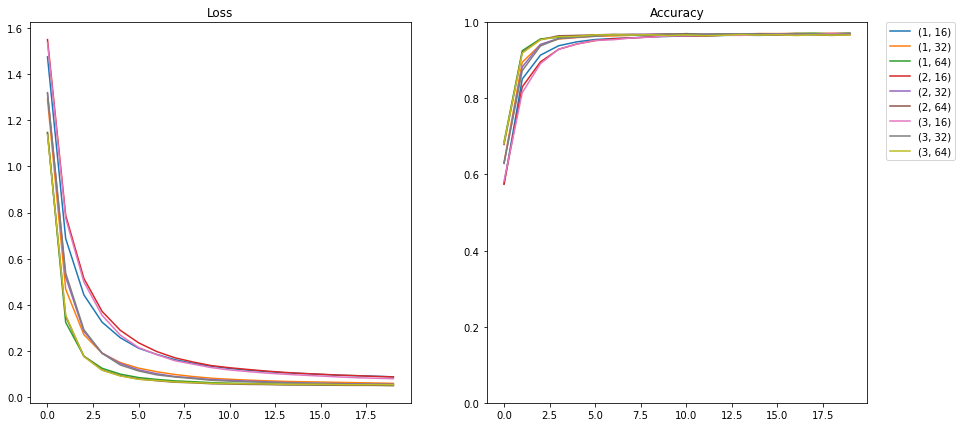

In [28]:
layer_neuron = list(zip(sum([[i]*3 for i in layers_num], []), neurons_num*3))

# 視覺化訓練過程
plt.figure(figsize=(15, 7))

# 繪製 Training loss
plt.subplot(121)
for k in range(len(layer_neuron)):
    plt.plot(range(len(all_loss[k])), all_loss[k], label=layer_neuron[k])
plt.title('Loss')

# 繪製 Training accuracy
plt.subplot(122)
for k in range(len(layer_neuron)):
    plt.plot(range(len(all_acc[k])), all_acc[k], label=layer_neuron[k])
plt.title('Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylim((0, 1))
plt.show()

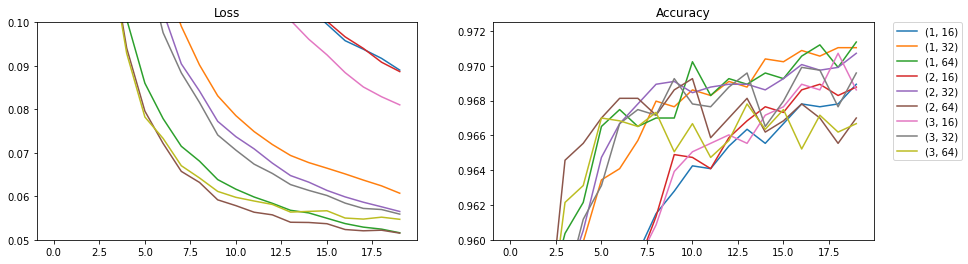

In [29]:
# 視覺化訓練過程
plt.figure(figsize=(15, 4))

# 繪製 Training loss
plt.subplot(121)
for k in range(len(layer_neuron)):
    plt.plot(range(len(all_loss[k])), all_loss[k], label=layer_neuron[k])
plt.title('Loss')
plt.ylim((0.05, 0.1))

# 繪製 Training accuracy
plt.subplot(122)
for k in range(len(layer_neuron)):
    plt.plot(range(len(all_acc[k])), all_acc[k], label=layer_neuron[k])
plt.title('Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0.96, 0.9725))
plt.show()

---
### Quiz
請試著利用 Data/pkgo_train.csv 做多元分類問題，預測五個種類的 pokemon，並調整模型（網路層數、神經元數目、激活函數）以及訓練相關的參數得到更高的準確度。